# Sharpe Ratio and Portfolio Values

In [27]:
import pandas as pd
import quandl   
import matplotlib.pyplot as plt
%matplotlib inline

## Create a Portfolio

In [2]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')  

In [5]:
# 4 stocks that we picked 

appl = quandl.get('WIKI/AAPL.11', start_date=start, end_date=end)
cisco = quandl.get('WIKI/CSCO.11', start_date=start, end_date=end)
ibm = quandl.get('WIKI/IBM.11', start_date=start, end_date=end)
amzn = quandl.get('WIKI/AMZN.11', start_date=start, end_date=end)

In [7]:
appl

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183
...,...
2016-12-23,115.080808
2016-12-27,115.811668
2016-12-28,115.317843


## Normalize Prices

This is the same as cumulative daily returns

In [8]:
# very first price 
appl.iloc[0]['Adj. Close']

52.848786580038

In [9]:
# Normalizing a price 
# We took each value in the adjusted close and divided it by the first value in the adjusted close 
for stock_df in (appl, cisco, ibm, amzn):
    stock_df['Normal Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [10]:
appl.head()

,Adj. Close,Normal Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [11]:
appl.tail()

,Adj. Close,Normal Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


In [ ]:
# 30% in apple 
# 20% in cisco
# 40% in amazon 
# 10% in ibm 

In [30]:
# arbituary allocation values 
list(zip((appl,cisco,ibm,amzn),[0.3,0.2,0.4,0.1]))

[(            Adj. Close  Normal Return  Allocation  Position Values
  Date                                                              
  2012-01-03   52.848787       1.000000    0.300000    300000.000000
  2012-01-04   53.132802       1.005374    0.301612    301612.236461
  2012-01-05   53.722681       1.016536    0.304961    304960.727573
  2012-01-06   54.284287       1.027162    0.308149    308148.724558
  2012-01-09   54.198183       1.025533    0.307660    307659.946988
  ...                ...            ...         ...              ...
  2016-12-23  115.080808       2.177549    0.653265    653264.617079
  2016-12-27  115.811668       2.191378    0.657413    657413.396830
  2016-12-28  115.317843       2.182034    0.654610    654610.167268
  2016-12-29  115.288214       2.181473    0.654442    654441.973495
  2016-12-30  114.389454       2.164467    0.649340    649340.095692
  
  [1258 rows x 4 columns],
  0.3),
 (            Adj. Close  Normal Return  Allocation  Position Val

## Allocations

Let's pretend we had the following allocations for our total portfolio:

* 30% in Apple
* 20% in Google/Alphabet
* 40% in Amazon
* 10% in IBM

Let's have these values be reflected by multiplying our Norme Return by out Allocations

In [14]:
# get an allocation column where we record our allocation 
for stock_df , allo in zip((appl,cisco,ibm,amzn), [0.3,0.2,0.4,0.1]):
    stock_df['Allocation'] = stock_df['Normal Return'] *allo    


In [15]:
# what returns are portfolio wise 
appl.head()

,Adj. Close,Normal Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


## Investment

Let's pretend we invested a million dollars in this portfolio

In [16]:
# Position values are calulated which are calculated by multiplying the allocation with the million dollars 
for stock_df in (appl,cisco,ibm,amzn):
    stock_df['Position Values'] = stock_df['Allocation']*1000000

In [17]:
# What we see are :
# Adjusted close,
# the normalized return (cumulative return), 
# allocated return, 
# position value which is multiplied by allocation 
appl.head()

,Adj. Close,Normal Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


## Total Portfolio Value

In [21]:
# Get position values 

all_pos_vals = [appl['Position Values'], cisco['Position Values'], ibm['Position Values'], amzn['Position Values']]
portfolio_val = pd.concat(all_pos_vals, axis=1)

In [22]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [23]:
portfolio_val.columns = ['APPL Pos', 'CISCO Pos', 'IBM Pos', 'AMZN Pos']

In [25]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [26]:
portfolio_val

,APPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06
...,...,...,...,...,...
2016-12-23,653264.617079,377469.015679,407359.955612,424839.412389,1.862933e+06
2016-12-27,657413.396830,379323.596496,408410.671112,430877.506563,1.876025e+06
2016-12-28,654610.167268,376108.989746,406089.322915,431285.259454,1.868094e+06


Text(0.5, 1.0, 'Total Portfolio Value')

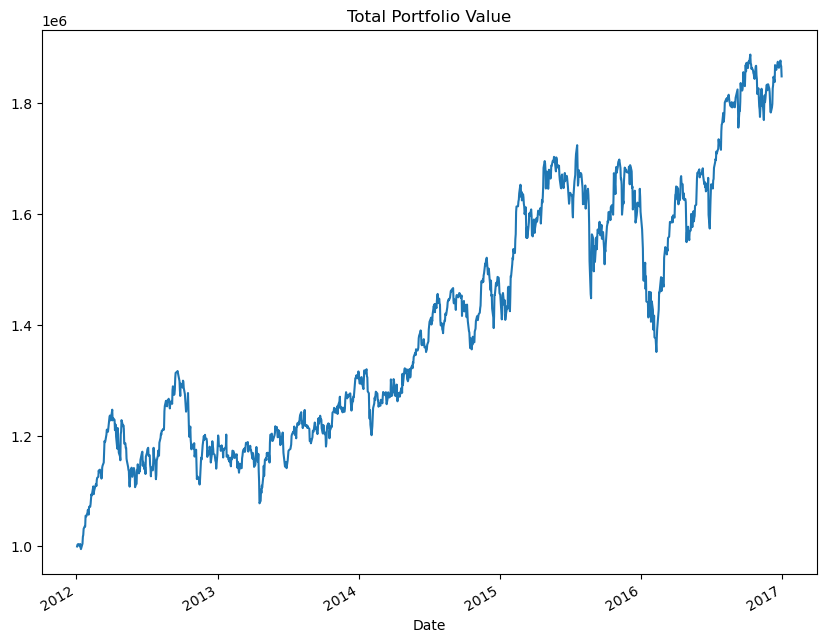

In [28]:
# Graph the total position 

portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

<Axes: xlabel='Date'>

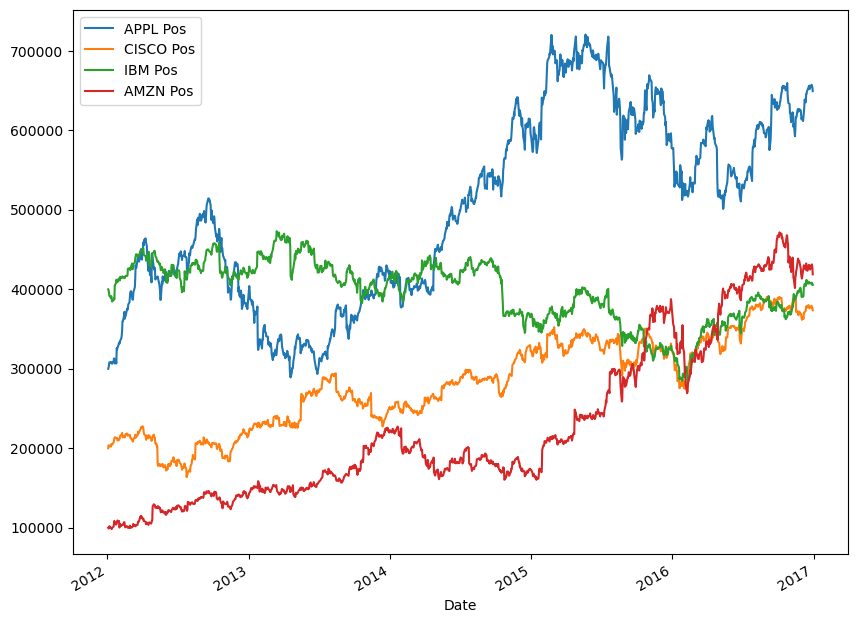

In [29]:
portfolio_val.drop('Total Pos', axis=1).plot(figsize=(10,8))

# Portfolio Statistics
### Daily Returns

In [31]:
portfolio_val.head()

,APPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


### Cumulative Return

In [32]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [33]:
portfolio_val.head()

,APPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


### Avg Daily Return

In [34]:
portfolio_val['Daily Return'].mean()

0.0005442330716215244

### Std Daily Return

In [35]:
portfolio_val['Daily Return'].std()

0.010568287769161716

<Axes: ylabel='Frequency'>

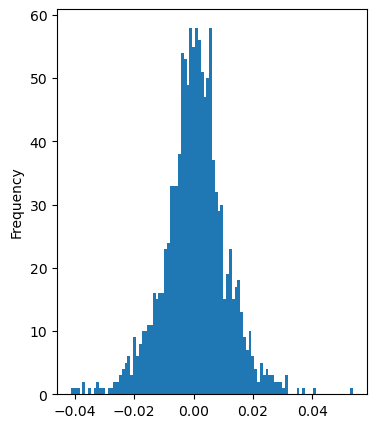

In [36]:
portfolio_val['Daily Return'].plot(kind='hist', bins=100, figsize=(4,5))

<Axes: ylabel='Density'>

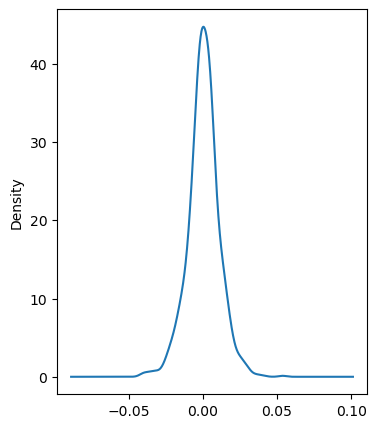

In [37]:
portfolio_val['Daily Return'].plot(kind='kde', figsize=(4,5))

In [39]:
# time period 0 to the last time period what was the total return percent 
# Get the portfolio value at the very end and divide by portfolio value total position 
cumulative_return = 100* (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1)

/var/folders/t0/60fymqpx2ng9940c53_kk14w0000gn/T/ipykernel_17399/584787254.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cumulative_return = 100* (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] -1)


In [40]:
# return is 84.7%

cumulative_return

84.74285181665545

In [41]:
# what are end value would be 
portfolio_val['Total Pos'][-1]

/var/folders/t0/60fymqpx2ng9940c53_kk14w0000gn/T/ipykernel_17399/1278574521.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  portfolio_val['Total Pos'][-1]


1847428.5181665544

# Sharpe Ratio

The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations. 

Sharpe ratio = (Mean portfolio return − Risk-free rate)/Standard deviation of portfolio return

The original Sharpe Ratio

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

* Daily = sqrt(252)
* Weekly = sqrt(52)
* Monthly = sqrt(12)

Since I'm based in the USA, I will use a very low risk-free rate (the rate you would get if you just put your money in a bank, its currently very low in the USA, let's just say its ~0% return). If you are in a different country with higher rates for your trading currency, you can use this trick to convert a yearly rate with a daily rate:

daily_rate = ((1.0 + yearly_rate)**(1/252))-1

Other values people use are things like the 3-month treasury bill or [LIBOR](http://www.investopedia.com/terms/l/libor.asp).

Read more: Sharpe Ratio http://www.investopedia.com/terms/s/sharperatio

In [42]:
# SHARPE Ratio 
# We are using 0 for right now but it changes as per the federal needs
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()

In [43]:
SR

0.05149680662648093

In [44]:
# Since SR was used for yearly basis 
# we need to multiply with a k value which is a sampling rate and in our case it is daily which is 252 
ASR= (252**0.5)*SR

In [45]:
ASR

0.8174864618859097

In [46]:
# A sharpe ratio greater than 1 is usually considered acceptable to good based on the customer portfolio 
# A sharpe value of 2 is considered good 
# A sharpe ratio of 3 is great/amazing 

In [ ]:
# Random guessing and checking is considered Monte Carlo Simulation 
